In [1]:
import rlssm
import pandas as pd
import os

#### Import the grouped data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)
data = data[data.participant == 10].reset_index(drop=True)

data['block_label'] += 1

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,10,1.0,1.0,61.0,52.0,4,3,1.0,1.285418,0.0
1,10,1.0,2.0,54.0,37.0,4,2,1.5,1.577622,0.0
2,10,1.0,3.0,51.0,51.0,4,3,2.5,1.564731,0.0
3,10,1.0,4.0,50.0,35.0,3,1,2.0,1.217245,1.0
4,10,1.0,5.0,59.0,50.0,4,2,3.0,1.929781,0.0


In [3]:
model = rlssm.RDModel_2A(1, starting_point_bias=False)

TypeError: __init__() got an unexpected keyword argument 'starting_point_bias'

In [4]:
# sampling parameters
n_iter = 1000
n_chains = 5
n_thin = 5


# bayesian model
drift_priors = None
threshold_priors = None
ndt_priors = None

In [5]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 500 iterations ended with a divergence (0.0%)
0 of 500 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


#### get Rhat

In [6]:
model_fit.rhat.describe()

,rhat
count,4.000000
mean,1.005565
std,0.002250
min,1.003164
25%,1.003973
50%,1.005532
75%,1.007125
max,1.008033


In [7]:
model_fit.rhat.head()

,rhat,variable
0,1.003164,drift_cor
1,1.004242,drift_inc
2,1.008033,threshold
3,1.006822,ndt


#### get wAIC

In [8]:
model_fit.waic

{'lppd': -234.30298727614354,
 'p_waic': 3.164286193794239,
 'waic': 474.93454693987553,
 'waic_se': 27.897477594290326}

### Posteriors

In [9]:
model_fit.samples

,chain,draw,transf_drift_cor,transf_drift_inc,transf_threshold,transf_ndt
0,0,80,1.511521,0.659431,1.652182,0.662418
1,0,95,1.860247,0.754633,1.826745,0.615298
2,0,72,1.942867,0.997096,2.054902,0.559565
3,0,22,1.875151,1.050758,1.871815,0.632414
4,0,75,1.566996,0.698083,1.480643,0.710542
...,...,...,...,...,...,...
495,4,75,1.462038,0.712358,1.340827,0.753441
496,4,80,1.976660,1.091857,2.179877,0.565816
497,4,96,1.713776,0.912719,1.745154,0.643070
498,4,39,1.955643,1.193205,2.221362,0.520565


In [10]:
model_fit.trial_samples

OrderedDict([('drift_cor_t',
              array([[1.51152088, 1.51152088, 1.51152088, ..., 1.51152088, 1.51152088,
                      1.51152088],
                     [1.86024663, 1.86024663, 1.86024663, ..., 1.86024663, 1.86024663,
                      1.86024663],
                     [1.94286748, 1.94286748, 1.94286748, ..., 1.94286748, 1.94286748,
                      1.94286748],
                     ...,
                     [1.71377598, 1.71377598, 1.71377598, ..., 1.71377598, 1.71377598,
                      1.71377598],
                     [1.95564321, 1.95564321, 1.95564321, ..., 1.95564321, 1.95564321,
                      1.95564321],
                     [1.77789733, 1.77789733, 1.77789733, ..., 1.77789733, 1.77789733,
                      1.77789733]])),
             ('drift_inc_t',
              array([[0.65943079, 0.65943079, 0.65943079, ..., 0.65943079, 0.65943079,
                      0.65943079],
                     [0.75463302, 0.75463302, 0.75463302, .

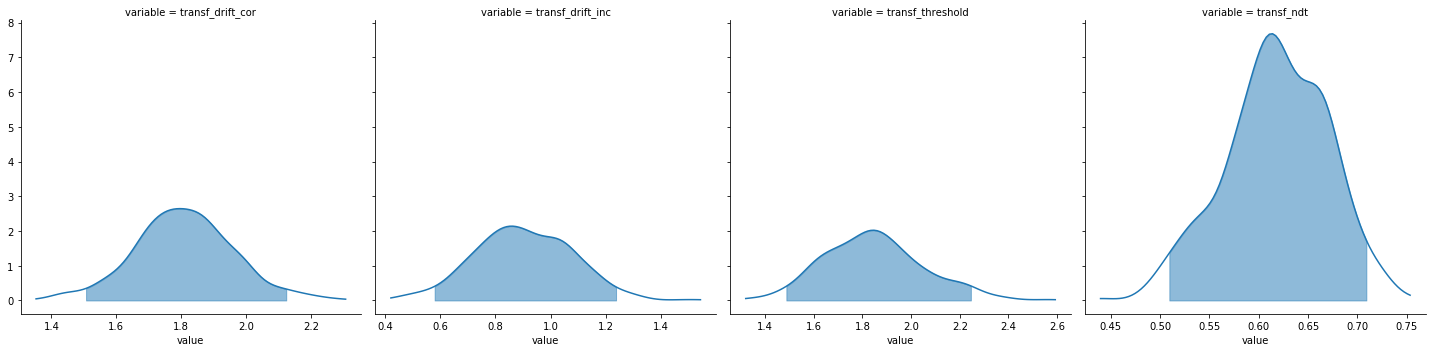

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

In [12]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [13]:
pp_rt

array([[2.16341834, 1.21841834, 1.30741834, ..., 1.46341834, 1.62341834,
        1.53441834],
       [1.00829827, 0.89829827, 1.25129827, ..., 1.29629827, 1.86929827,
        1.29729827],
       [1.13056531, 1.09156531, 0.97356531, ..., 1.85856531, 1.92656531,
        2.30656531],
       ...,
       [1.63616195, 1.70816195, 1.58116195, ..., 1.47416195, 1.08716195,
        1.17416195],
       [1.3923641 , 2.8303641 , 1.0213641 , ..., 1.1933641 , 3.3083641 ,
        1.7503641 ],
       [1.43142566, 1.38142566, 1.26642566, ..., 1.00742566, 1.05842566,
        1.64542566]])

In [14]:
pp_acc

array([[0., 0., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.719665,1.584900,1.100493,1.167418,1.397018,1.572418,1.840418,2.259618,1.049118,1.234118,1.397418,1.722318,2.208718
2,0.790795,1.506420,1.699050,1.032698,1.196998,1.378298,1.557498,1.979298,1.053298,1.246298,1.421298,1.676698,2.075498
3,0.736402,1.526042,1.125519,1.107165,1.251365,1.433565,1.681565,1.989965,1.071565,1.233065,1.429565,1.656065,2.166065
4,0.736402,1.505828,1.368699,1.088414,1.251814,1.439414,1.595214,2.221414,1.064414,1.249914,1.397914,1.585414,2.106914
5,0.694561,1.498224,1.759702,1.057342,1.208742,1.423542,1.587942,2.029542,1.062542,1.229542,1.381042,1.526042,2.286042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.769874,1.514588,1.287075,1.153718,1.248118,1.379918,1.565318,2.113918,1.081818,1.238918,1.442918,1.658318,2.096318
97,0.736402,1.523723,2.033156,1.123179,1.264179,1.420179,1.657979,1.884779,1.057179,1.261679,1.430179,1.650679,2.020179
98,0.765690,1.494622,1.025954,1.095162,1.305662,1.395162,1.560162,2.004162,1.079762,1.239962,1.435162,1.656962,1.956162


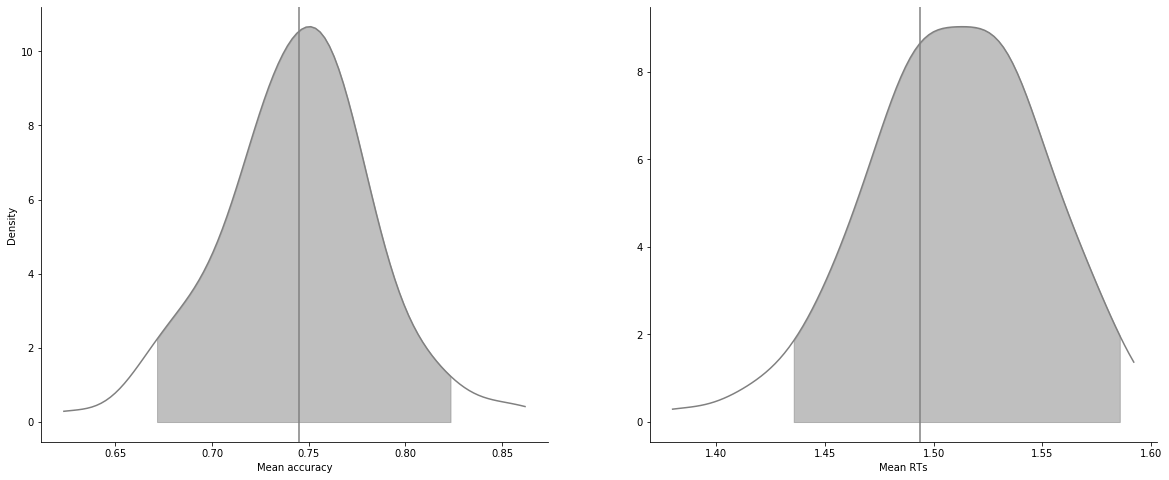

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

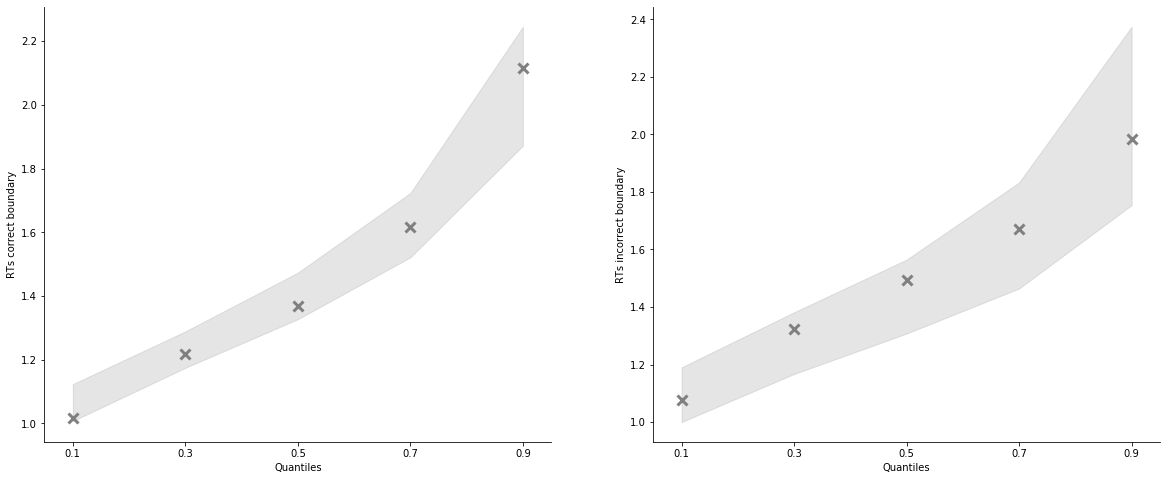

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,10,1.0,1.0,61.0,52.0,4,3,1.0,1.285418,0.0,2,CD,1
1,1,10,1.0,2.0,54.0,37.0,4,2,1.5,1.577622,0.0,2,BD,1
2,2,10,1.0,3.0,51.0,51.0,4,3,2.5,1.564731,0.0,2,CD,1
3,3,10,1.0,4.0,50.0,35.0,3,1,2.0,1.217245,1.0,1,AC,1
4,4,10,1.0,5.0,59.0,50.0,4,2,3.0,1.929781,0.0,2,BD,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1                0.80  1.473568  0.858007   
                        2                0.80  1.482898  0.756980   
                        3                0.65  1.441465  1.349635   
                        4                0.50  1.497214  1.339980   
                        5                0.80  1.494142  0.580790   
...                                       ...       ...       ...   
3.0         CD          96               0.80  1.431118  1.317111   
                        97               0.75  1.558579  1.496141   
                        98               0.95  1.424412  2.484292   
                        99               0.65  1.353264  1.842226   
                        100              0.65  1.471176  1.564838   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.293818             1.258418   
                        2                    1.276198             1.396798   
                        3                    1.129765             1.346165   
                        4                    1.210514             1.222814   
                        5                    1.263742             1.377542   
...                                               ...                  ...   
3.0         CD          96                   0.994118             1.313918   
                        97                   1.178179             1.413579   
                        98                   1.225162             1.260162   
                        99                   1.176964             1.188764   
                        100                  1.307426             1.330626   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.467418             1.398418   
                        2                    1.357298             1.448798   
                        3                    1.246565             1.405565   
                        4                    1.268414             1.315914   
                        5                    1.479542             1.404542   
...                                               ...                  ...   
3.0         CD          96                   1.155418             1.477918   
                        97                   1.398179             1.539179   
                        98                   1.225162             1.335162   
                        99                   1.358364             1.226364   
                        100                  1.317426             1.403426   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    1.705018             1.631418  
                        2                    1.506698             1.571798  
                        3                    1.287365             1.601965  
                        4                    1.599214             1.512914  
                        5                    1.686042             1.608542  
...                                               ...                  ...  
3.0         CD          96                   1.354818             1.586418  
                        97                   1.451779             1.749779  
                        98                   1.225162             1.493562  
                        99                   1.779964             1.263364  
                        100                  1.699026             1.492026  

[1200 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.966667  1.393318  1.632558               0.958418   
           2            0.800000  1.510665  0.786026               1.070798   
           3            0.933333  1.506165  0.661462               1.625165   
           4            0.766667  1.576914  1.260345               1.395214   
           5            0.666667  1.353542  1.061087               1.166042   
...                          ...       ...       ...                    ...   
8          96           0.620690  1.553953  1.155611               1.166918   
           97           0.655172  1.456455  1.376282               1.255479   
           98           0.689655  1.577748  1.666124               1.199362   
           99           0.724138  1.452123  1.071783               1.215164   
           100          0.689655  1.489391  1.050090               1.282826   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.160018               0.958418   
           2                  1.350598               1.273798   
           3                  1.291865               1.857565   
           4                  1.333014               1.420414   
           5                  1.102642               1.251042   
...                                ...                    ...   
8          96                 1.322718               1.402918   
           97                 1.219379               1.381179   
           98                 1.218262               1.389162   
           99                 1.144364               1.331364   
           100                1.286626               1.327426   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.345418               0.958418   
           2                  1.531798               1.458798   
           3                  1.416065               2.089965   
           4                  1.424414               1.686014   
           5                  1.390042               1.304842   
...                                ...                    ...   
8          96                 1.541418               1.478918   
           97                 1.399179               1.579079   
           98                 1.369162               1.600562   
           99                 1.267364               1.792264   
           100                1.475926               1.412026   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.465218  
           2                  1.673298  
           3                  1.604965  
           4                  1.596614  
           5                  1.647842  
...                                ...  
8          96                 1.786918  
           97                 1.490179  
           98                 1.668462  
           99                 1.536364  
           100                1.729926  

[800 rows x 9 columns]

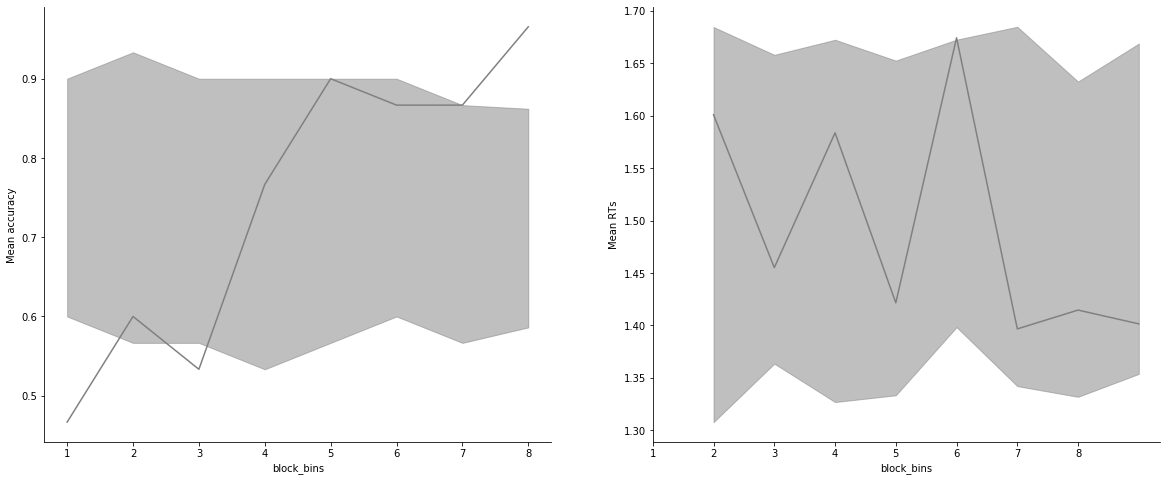

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

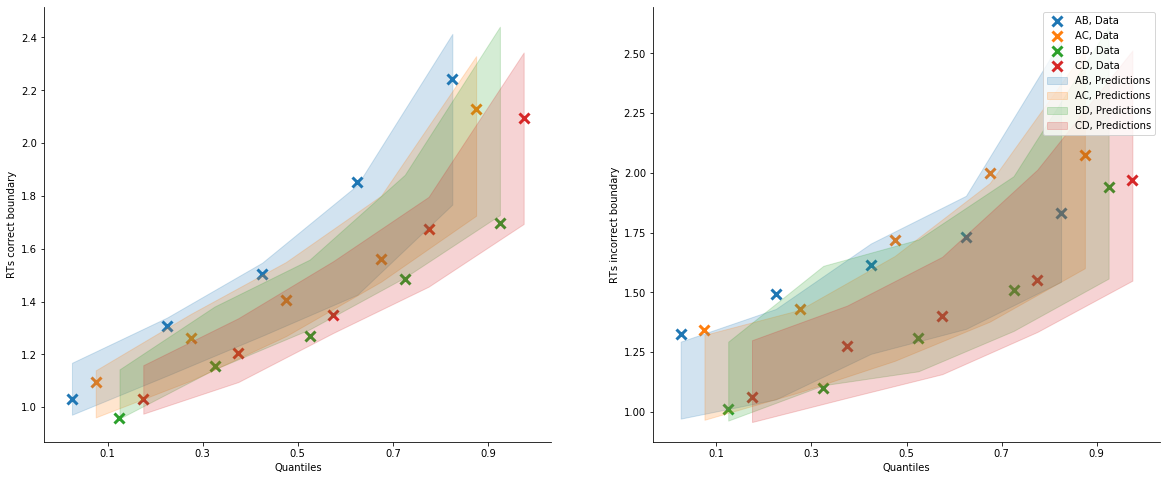

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

### Get last values for eventual further sampling

In [25]:
sv = model_fit.last_values
sv

,chain,draw,warmup,drift_cor,drift_inc,ndt,threshold
99,0,99,0,1.781057,0.728999,-0.314078,1.969399
199,1,99,0,1.626808,0.565102,-0.177539,1.718690
299,2,99,0,1.420139,0.029319,-0.052865,1.435712
399,3,99,0,1.838099,0.598794,-0.218182,1.875462
499,4,99,0,1.616728,0.479091,-0.253078,1.766643
